In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('ds_salaries.csv')

## Data preprocessing ##

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
# Check if data is null
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
# Check for duplication
df.duplicated().sum()

1171

In [13]:
# Eraser duplication
df.drop_duplicates(inplace=True)

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
work_year,2584.0,NaN,NaN,NaN,2022.301084,0.749179,2020.0,2022.0,2022.0,2023.0,2023.0
experience_level,2584,4,SE,1554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,2584,4,FT,2547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,2584,93,Data Engineer,598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,2584.0,NaN,NaN,NaN,210365.29644,808037.535609,6000.0,90000.0,134630.0,182562.5,30400000.0
salary_currency,2584,20,USD,2107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_in_usd,2584.0,NaN,NaN,NaN,133409.280186,67136.837329,5132.0,84975.0,130000.0,175000.0,450000.0
employee_residence,2584,78,US,1893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,2584.0,NaN,NaN,NaN,50.483746,48.163707,0.0,0.0,50.0,100.0,100.0
company_location,2584,72,US,1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Size of dataset
df.shape

(2584, 11)

## Question ##

### Thành Đức

Question 1:

Question 2:

## Bá Đức ##

Question 1: Các ngành nào nhiều nhân sự nhất và mức lương trung bình tương ứng với mỗi ngành

/tmp/ipykernel_14640/4041707435.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_df.index, y='count', data=combined_df, ax=ax1, palette='viridis', alpha=0.6)


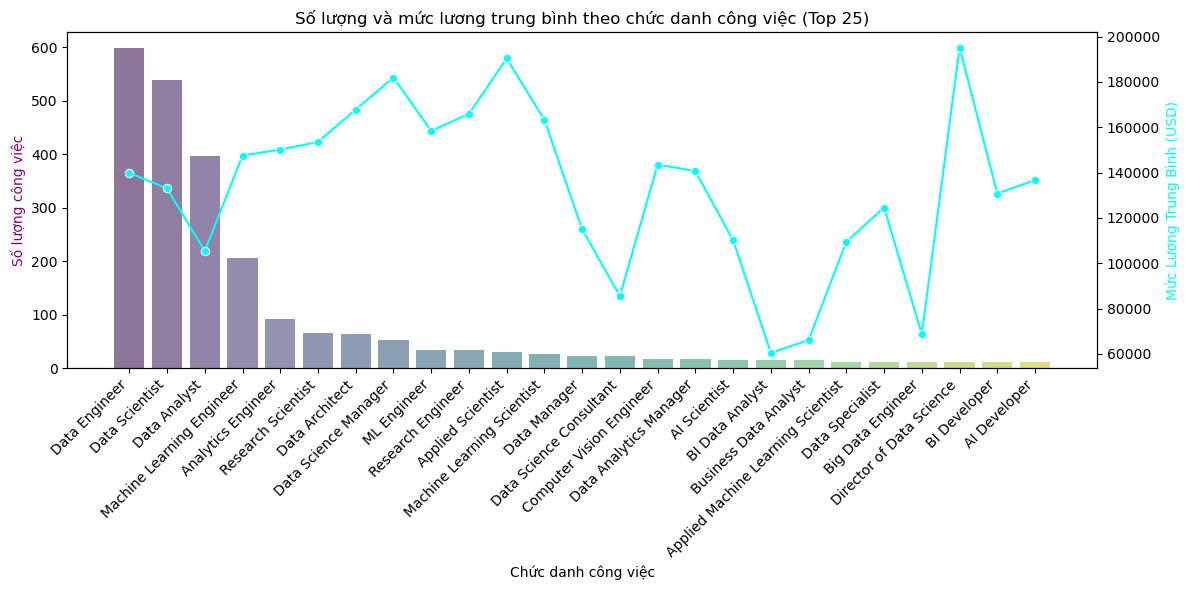

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ds_salaries.csv')

# Eraser duplicate
df.drop_duplicates(inplace=True)

counts=df['job_title'].value_counts().head(25)

# Filter the DataFrame based on job titles in counts.index
filtered_df = df[df['job_title'].isin(counts.index)]

# Group by job_title and calculate the average salary
average_salary = filtered_df.groupby('job_title')['salary_in_usd'].mean()

# Create a DataFrame
combined_df = pd.DataFrame({'count': counts, 'average_salary': average_salary})
combined_df = combined_df.sort_values(by='count', ascending=False)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for counts
sns.barplot(x=combined_df.index, y='count', data=combined_df, ax=ax1, palette='viridis', alpha=0.6)
plt.xticks(rotation=45, ha='right')

# Create a second y-axis
ax2 = ax1.twinx()

# Line plot for average salary
sns.lineplot(x=combined_df.index, y='average_salary', data=combined_df, ax=ax2, color='cyan', marker='o')

# Customize axes
ax1.set_ylabel('Số lượng công việc', color='purple')
ax2.set_ylabel('Mức Lương Trung Bình (USD)', color='cyan')
ax1.set_xlabel('Chức danh công việc')
plt.title('Số lượng và mức lương trung bình theo chức danh công việc (Top 25)')

# Ensure x-ticks align with the bars
# ax1.set_xticks(range(len(combined_df.index)))  # Set the positions of the ticks
# ax1.set_xticklabels(combined_df.index, rotation=45, ha='right')  # Set the tick labels and rotate them

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


Question 2: Với từng kinh nghiệm làm việc (experience level), số lượng công việc cho top 10 chức danh công việc (job title) hàng đầu là bao nhiêu

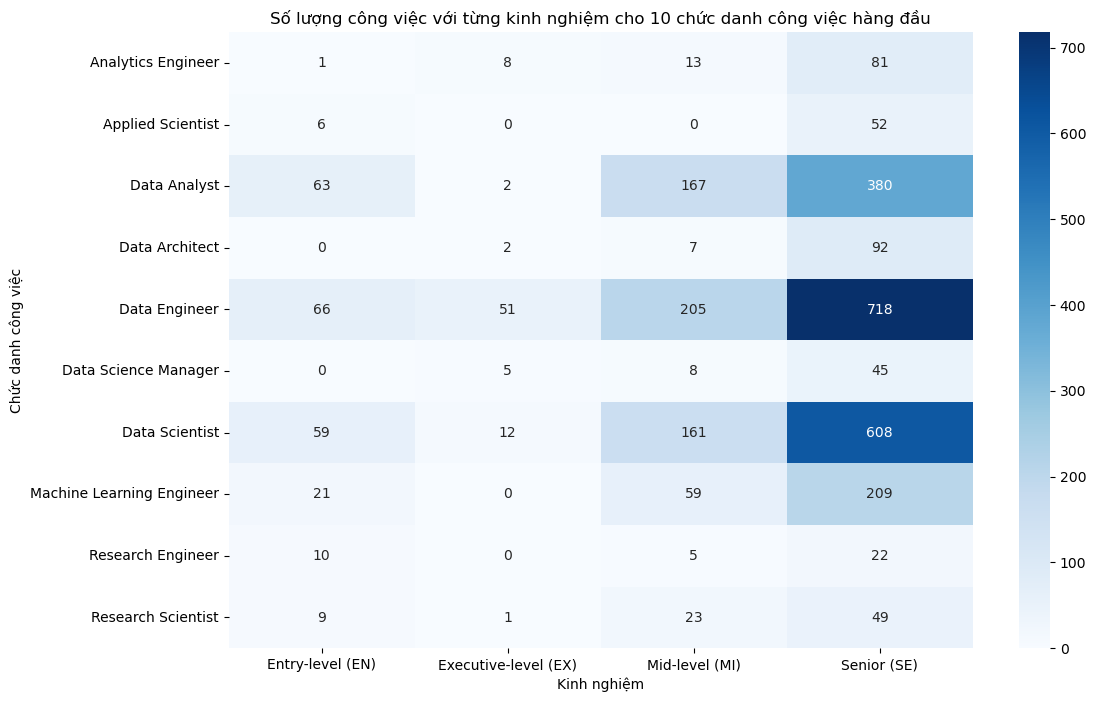

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bước 1: Tìm 10 tiêu đề công việc hàng đầu
top_10_job_titles = df['job_title'].value_counts().head(10).index

# Bước 2: Lọc dữ liệu chỉ cho những tiêu đề công việc hàng đầu
filtered_df = df[df['job_title'].isin(top_10_job_titles)]

# Bước 3: Tạo bảng tổng hợp (pivot table)
heatmap_data = filtered_df.pivot_table(index='job_title', columns='experience_level', aggfunc='size', fill_value=0)

# Bước 4: Tạo heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')

# Thay đổi nhãn trên trục x
new_labels = ['Entry-level (EN)', 'Executive-level (EX)', 'Mid-level (MI)', 'Senior (SE)']
heatmap.set_xticklabels(new_labels, rotation=0, ha='center')

plt.title('Số lượng công việc với từng kinh nghiệm cho 10 chức danh công việc hàng đầu')
plt.xlabel('Kinh nghiệm')
plt.ylabel('Chức danh công việc')
plt.show()

### Bá Duy ###

Question 1:

Question 2:

### Duy Lân ###

Question 1:

Question 2: